In [1]:
import pandas as pd
import numpy as np

train_file = r'D:\data_kaggle\digit-recognizer\train.csv'
train = pd.read_csv(train_file)
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

train_x = train.drop(['label'], axis=1)
train_y = train['label']
test_x = pd.read_csv(r'D:\data_kaggle\digit-recognizer\test.csv')

kf = KFold(n_splits=4, shuffle=True, random_state=123)

tr_idx, val_idx = list(kf.split(train_x))[0]
print("tr_idx = ", tr_idx)
print("va_idx = ", val_idx)
tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[val_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[val_idx]

tr_x, va_x = np.array(tr_x / 255.0), np.array(va_x / 255.0)

tr_y = to_categorical(tr_y, 10)
va_y = to_categorical(va_y, 10)

print(tr_x.shape)
print(tr_y.shape)
print(va_x.shape)
print(va_y.shape)

tr_idx =  [    0     2     3 ... 41996 41997 41998]
va_idx =  [    1    15    19 ... 41994 41995 41999]
(31500, 784)
(31500, 10)
(10500, 784)
(10500, 10)


C:\Users\clare\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

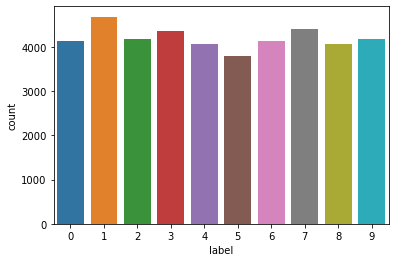

In [8]:
import seaborn as sns
sns.countplot(train['label'])

In [9]:
print(tr_x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

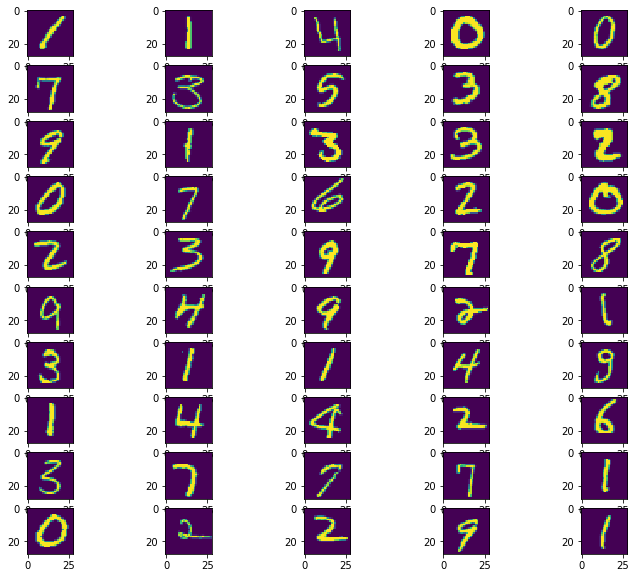

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
x, y = 10, 5
for i in range(50):
    plt.subplot(x, y, i+1)
    plt.imshow(tr_x[i].reshape((28, 28)), interpolation='nearest')
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(128, input_dim=tr_x.shape[1], activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
result = model.fit(tr_x, tr_y, epochs=10, batch_size=100, validation_data=(va_x, va_y), verbose=1)

Epoch 1/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1611 - accuracy: 0.9545 - val_loss: 0.1704 - val_accuracy: 0.9512
Epoch 2/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1438 - accuracy: 0.9597 - val_loss: 0.1601 - val_accuracy: 0.9525
Epoch 3/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1301 - accuracy: 0.9628 - val_loss: 0.1493 - val_accuracy: 0.9554
Epoch 4/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1179 - accuracy: 0.9672 - val_loss: 0.1418 - val_accuracy: 0.9564
Epoch 5/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1080 - accuracy: 0.9697 - val_loss: 0.1333 - val_accuracy: 0.9599
Epoch 6/10
315/315 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9723 - val_loss: 0.1286 - val_accuracy: 0.9596
Epoch 7/10
315/315 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9749 - val_loss: 0.1247 - val_accuracy: 0.9615
Epoch 

In [14]:
ans = model.predict(test_x)

In [16]:
print(ans[:5])
print([x.argmax() for x in ans[:5]])
y_test = [x.argmax() for x in ans]

[[7.63189564e-06 8.29024486e-07 9.97847319e-01 1.76072214e-03
  1.18401196e-07 1.49755886e-06 2.13095427e-06 3.59530881e-04
  2.01625935e-05 9.68501936e-08]
 [9.99729455e-01 2.19719158e-08 3.93300361e-05 1.22844199e-06
  2.97856495e-09 2.15979235e-04 1.17879495e-06 1.26495006e-05
  1.18493702e-07 1.56107390e-07]
 [2.12818235e-11 2.07968640e-07 7.74595549e-07 2.50332796e-05
  4.43157100e-04 2.37016297e-06 2.35345006e-08 4.38403447e-07
  4.03014186e-04 9.99124944e-01]
 [3.21043166e-03 1.44002479e-06 4.06072568e-03 4.02002797e-06
  3.63995701e-01 8.24071503e-06 1.63329623e-05 1.20052730e-03
  1.34879211e-03 6.26153767e-01]
 [1.48557492e-05 1.11106914e-04 2.39125290e-03 9.97229636e-01
  2.55670884e-09 1.31812936e-04 6.31972352e-06 1.00454190e-06
  1.13792514e-04 1.65614253e-07]]
[2, 0, 9, 9, 3]


In [17]:
submit_df = pd.read_csv(r'D:\data_kaggle\digit-recognizer\sample_submission.csv')
submit_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [18]:
submit_df['Label'] = y_test
submit_df.head()
submit_df.to_csv('submission_baseline.csv', index=False)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
